# CPSC 425 - Computer Vision

## Homework 1: Image Filtering and Hybrid Images

### Leo Foord-Kelcey - 83974592

**Due date: Sep 27**

### Boilerplate

In [1]:
from PIL import Image
import numpy as np
import math
import cv2 as cv
from scipy import signal
import time

### Submission Notes

All input images are to be read from a directory named `./images` and similarly all outputs will be written to the aforementioned directory. <br>
PDF solutions to `Part 1` are merged to this script inclusive PDF. <br>
Otherwise all solutions should be on this notebook as code or markdown <br>
Thanks!

## Part 1: Written Questions

In this part of the assignment, you will be practicing filtering by hand on a given "image". You may find the questions here (if you are familiar with LaTex, feel free to use the following template to generate the answers). Annotate your results on the PDF. During submission, you will merge this PDF with your report. Make sure that you put this right after your report cover page.

<div class="alert alert-warning">

Part 1: Solution
    
</div>

Solution attached to PDF

## Part 2: Gaussian Filtering

### Question 1 (3 points)

In CPSC 425, we follow the convention that 2D filters always have an odd number of rows and columns (so that the center row/column of the filter is well-defined).

As a simple warm-up exercise, write a Python function, ‘boxfilter(n)’, that returns a box filter of size n by n. You should check that n is odd, checking and signaling an error with an ‘assert’ statement. The filter should be a Numpy array. For example, your function should work as follows:

	    
        >>> boxfilter(5)
        array([[ 0.04,  0.04,  0.04,  0.04,  0.04],
               [ 0.04,  0.04,  0.04,  0.04,  0.04],
               [ 0.04,  0.04,  0.04,  0.04,  0.04],
               [ 0.04,  0.04,  0.04,  0.04,  0.04],
               [ 0.04,  0.04,  0.04,  0.04,  0.04]])

        >>> boxfilter(4)
        Traceback (most recent call last):
          ...
        AssertionError: Dimension must be odd
        
    
HINT: The generation of the filter can be done as a simple one-line expression. Of course, checking that n is odd requires a bit more work.

Show the results of your boxfilter(n) function for the cases n=3, n=4, and n=5.

<div class="alert alert-warning">

Part 2: Solution 1
    
</div>

In [2]:
# Produces an n x n box filter where n is odd 
def boxfilter(n):
    
    assert n%2 != 0, f"Dimension must be odd"
    
    return [[1 / n**2 for x in range(n)] for y in range(n)] 

In [3]:
boxfilter(3)

[[0.1111111111111111, 0.1111111111111111, 0.1111111111111111],
 [0.1111111111111111, 0.1111111111111111, 0.1111111111111111],
 [0.1111111111111111, 0.1111111111111111, 0.1111111111111111]]

In [38]:
# uncomment below to test that an even parameter will throw error. 

# boxfilter(4)

AssertionError: Dimension must be odd

In [5]:
boxfilter(5)

[[0.04, 0.04, 0.04, 0.04, 0.04],
 [0.04, 0.04, 0.04, 0.04, 0.04],
 [0.04, 0.04, 0.04, 0.04, 0.04],
 [0.04, 0.04, 0.04, 0.04, 0.04],
 [0.04, 0.04, 0.04, 0.04, 0.04]]

### Question 2 (5 points)

Write a Python function, ‘gauss1d(sigma)’, that returns a 1D Gaussian filter for a given value of sigma. The filter should be a 1D array with length 6 times sigma rounded up to the next odd integer. Each value of the filter can be computed from the Gaussian function, exp(- x^2 / (2*sigma^2)), where x is the distance of an array value from the center. This formula for the Gaussian ignores the constant factor. Therefore, you should normalize the values in the filter so that they sum to 1.

HINTS: For efficiency and compactness, it is best to avoid ‘for’ loops in Python. One way to do this is to first generate a 1D array of values for x, and map this array through the density function. Suppose you want to generate a 1D filter from a zero-centered Gaussian with a sigma of 1.6. The filter length would be odd(1.6*6)=11. You then generate a 1D array of x values [-5 -4 -3 -2 -1 0 1 2 3 4 5] and pass the 1D array through the given density function exp(- x^2 / (2*sigma^2)).

Show the filter values produced for sigma values of 0.3, 0.5, 1, and 2.

<div class="alert alert-warning">

Part 2: Solution 2
    
</div>

In [6]:
# Gaussian density function at a specific position
# x is the distance of an array value from the center
# sigma is the given value of sigma
def find_density(x, sigma):
    
    return math.exp(-((x**2)/(2*sigma**2)))

In [7]:
# Creates 1D Gaussian filter for a given value of sigma
def gauss1d(sigma):
    
    # 1D array with 6 times sigma rounded up to the next odd integer
    length = int(np.ceil(6*sigma) // 2 * 2 + 1)
    n = length // 2
    pos_arr = np.arange(-n, n+1, 1)
    
    # 1D array of same length populated with sigma
    sigma_arr = np.full(length, sigma)

    # Compute density values at each value
    result = np.array(list(map(find_density, pos_arr, sigma_arr)))
    
    # Normalize
    result = result / result.sum()
    
    return result

In [8]:
print('Sigma = 0.3: ', gauss1d(0.3))

Sigma = 0.3:  [0.00383626 0.99232748 0.00383626]


In [9]:
print('Sigma = 0.5: ', gauss1d(0.5))

Sigma = 0.5:  [0.10650698 0.78698604 0.10650698]


In [10]:
print('Sigma = 1: ', gauss1d(1))

Sigma = 1:  [0.00443305 0.05400558 0.24203623 0.39905028 0.24203623 0.05400558
 0.00443305]


In [11]:
print('Sigma = 2: ', gauss1d(2))

Sigma = 2:  [0.0022182  0.00877313 0.02702316 0.06482519 0.12110939 0.17621312
 0.19967563 0.17621312 0.12110939 0.06482519 0.02702316 0.00877313
 0.0022182 ]


### Question 3 (5 points)

Create a Python function ‘gauss2d(sigma)’ that returns a 2D Gaussian filter for a given value of sigma. The filter should be a 2D array. Remember that a 2D Gaussian can be formed by convolution of a 1D Gaussian with its transpose. You can use the function ‘convolve2d’ in the Scipy Signal Processing toolbox to do the convolution. You will need to provide signal.convolve2d with a 2D array. To convert a 1D array, f, to a 2D array f, of the same size you use ‘f = f[np.newaxis]’

Show the 2D Gaussian filter for sigma values of 0.5 and 1.

<div class="alert alert-warning">

Part 2: Solution 3
    
</div>

In [12]:
# Creates 2D Gaussian filter for a given value of sigma
def gauss2d(sigma):
    
    # Create 1D Gaussian w respective sigma
    f = gauss1d(sigma)
    
    # Convert to 2D array and transpose 
    a = np.expand_dims(f, 1)
    b = np.expand_dims(f, 0) 
    
    # Convolve
    return signal.convolve2d(a, b)

In [13]:
print('Sigma = 0.5: ', gauss2d(0.5))

Sigma = 0.5:  [[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]


In [14]:
print('Sigma = 1: ', gauss2d(1))

Sigma = 1:  [[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]]


### Question 4 (10 points)

(a) Write a function ‘convolve2d_manual(array, filter)’ that takes in an image (stored in `array`) and a filter, and performs convolution to the image with zero paddings (thus, the image sizes of input and output are the same). Both input variables are in type `np.float32`. Note that for this implementation you should use two for-loops to iterate through each neighbourhood.

<div class="alert alert-warning">

Part 2: Solution 4a
   
</div>

In [15]:
# Performs convolution to an input array provided an appropriate filter
def convolve2d_manual(array, filter):
    
    # create output array
    img_x = array.shape[1]
    img_y = array.shape[0]
    result = np.zeros((img_y, img_x))

    # rotated filter by 180 for simplicity 
    flip_filter = np.flipud(np.fliplr(filter))
    
    # pad array with zeros with respect to filter size
    fil_size = filter.shape[1]
    assert fil_size%2 != 0, f"Filter length must be odd"
    pad_len = int(fil_size // 2)
    padded_arr = np.pad(array, pad_len, mode='constant')

    # populate result array with element wise multiplication of flipped filter and padded array 
    for x in range(img_x):
        for y in range(img_y):
 
            # current segment of padded array
            curr = padded_arr[y:y+fil_size, x:x+fil_size]
        
            # element size multiplication
            new = flip_filter*curr
            
            # sum elements in output array
            result[y,x] = new.sum()
    
    return result

(b) Write a function ‘gaussconvolve2d_manual(array,sigma)’ that applies Gaussian convolution to a 2D array for the given value of sigma. The result should be a 2D array. Do this by first generating a filter with your ‘gauss2d’, and then applying it to the array with ‘convolve2d_manual(array, filter)’

<div class="alert alert-warning">

Part 2: Solution 4b
    
</div>

In [16]:
# Applies Gaussian convolution to a 2D array for the given value of sigma
def gaussconvolve2d_manual(array, sigma):
    return convolve2d_manual(array, gauss2d(sigma))

(c) Apply your ‘gaussconvolve2d_manual’ with a sigma of 3 on the image of the dog. Download the image (right-click on an image in your browser and choose “save as”). Load this image into Python, convert it to a greyscale, Numpy array and run your ‘gaussconvolve2d’ (with a sigma of 3). Note, as mentioned in class, for any image filtering or processing operations converting image to a double array format will make your life a lot easier and avoid various artifacts. Once all processing operations are done, you will need to covert the array back to unsigned integer format for storage and display.

<div class="alert alert-warning">

Part 2: Solution 4c
    
</div>

In [17]:
# setup input image as 2D array
im = Image.open('images/dog.jpeg')
imL = im.convert('L')
dog_array = np.asarray(imL)

In [18]:
# compute and save gauss convolution of image
out = gaussconvolve2d_manual(dog_array, 3).astype('uint8')
out = Image.fromarray(out)
out.save('images/dog_gauss_manual.png','PNG')

(d) Use PIL to show both the original and filtered images.

<div class="alert alert-warning">

Part 2: Solution 4d
    
</div>

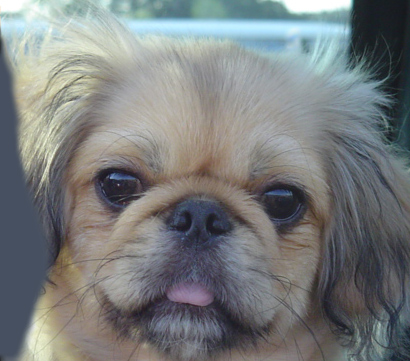

Original dog image



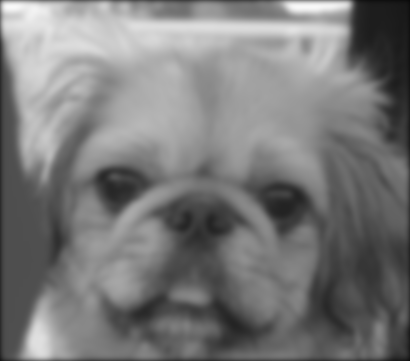

Manual gaussian filter on dog image



In [19]:
display(im)
print('Original dog image\n')

display(out)
print('Manual gaussian filter on dog image\n')

### Question 5 (7 points)

(a) Write a function ‘gaussconvolve2d_scipy(array,sigma)’ that applies Gaussian convolution to a 2D array for the given value of sigma. The result should be a 2D array. Do this by first generating a filter with your ‘gauss2d’, and then applying it to the array with signal.convolve2d(array,filter,'same'). The ‘same’ option makes the result the same size as the image.

The Scipy Signal Processing toolbox also has a function ‘signal.correlate2d’. Applying the filter ‘gauss2d’ to the array with signal.correlate2d(array,filter,'same') produces the same result as with signal.convolve2d(array,filter,'same'). Why does Scipy have separate functions ‘signal.convolve2d’ and ‘signal.correlate2d’? HINT: Think of a situation in which ‘signal.convolve2d’ and ‘signal.correlate2d’ (with identical arguments) produce different results.

<div class="alert alert-warning">

Part 2: Solution 5a
    
</div>

In [20]:
# Applies Gaussian convolution to a 2D array for the given value of sigma using the scipy library
def gaussconvolve2d_scipy(array, sigma):
    
    filter = gauss2d(sigma)
    
    return signal.convolve2d(array,filter,'same')

Recall the difference between computing a convolution and correlation is that, for convolution, the kernel must be rotated by 180 degrees to trivially compute the sum. That is to say, correlation is the same as convolution if the kernel is `rotationally symmetric`.

Now observing the Gaussian kernel, we can observe that it is in fact rotationally symmetric. This suggests that both correlation and convolution will produce the same result. 

This would not be the case for a kernel that does look the same when rotated by 180 degrees. 

(b) Apply your ‘gaussconvolve2d_scipy’ with a sigma of 3 on the image of the dog again. Follow instructions in part 4c for saving and loading the image.

<div class="alert alert-warning">

Part 2: Solution 5b
    
</div>

In [21]:
# compute and save gauss convolution of image
out_scipy = gaussconvolve2d_scipy(dog_array, 3).astype('uint8')
out_scipy = Image.fromarray(out_scipy)
out_scipy.save('images/dog_gauss_scipy.png','PNG')

(c) Use PIL to show both the original and filtered images.

<div class="alert alert-warning">

Part 2: Solution 5c
    
</div>

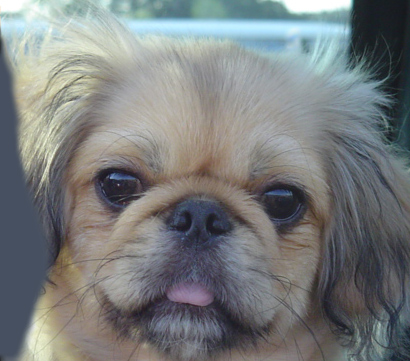

Original dog image



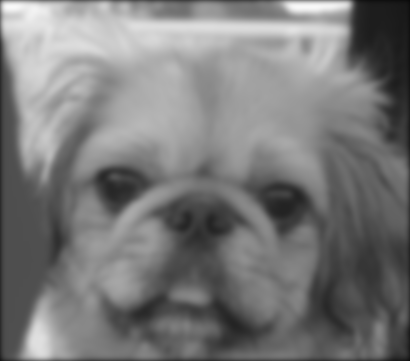

Scipy gaussian filter on dog image



In [22]:
display(im)
print('Original dog image\n')

display(out_scipy)
print('Scipy gaussian filter on dog image\n')

### Question 6 (2 points)

Experiment on how much time it takes to convolve the dog image above using your convolution implementation ‘gaussconvolve2d_manual’ and the scipy implementation ‘gaussconvolve2d’. Compare and comment on the performance using a sigma of 10.0. HINT: The following code shows you how to time a function. Also, depending on efficency of your implementation you may see different runtimes here compared to the the scipy implementation, that's OK. The key is thinking and explaining why you get a certain result.

        
        import time
        t1 = time.time() # start timestamp
        operations() # some operations to time
        duration = time.time() - t1 # duration in seconds

<div class="alert alert-warning">

Part 2: Solution 6
    
</div>

In [23]:
# print runtime of manual implementation
t1 = time.time() # start timestamp
gaussconvolve2d_manual(dog_array, 10)
d1 = time.time() - t1 # duration in seconds
print('Manual Implementation Duration: ', d1)

Manual Implementation Duration:  1.3934450149536133


In [24]:
# print runtime of scipy implementation
t2 = time.time() # start timestamp
gaussconvolve2d_manual(dog_array, 10)
d2 = time.time() - t2 # duration in seconds
print('Scipy Implementation Duration: ', d2)

Scipy Implementation Duration:  1.4185359477996826


Comparing the performance between the two implementations shows that they produce execute at a fairly similar pace with the scipy implementation having a small edge of ~0.02 seconds. 

### Question 7 (3 points)

Convolution with a 2D Gaussian filter is not the most efficient way to perform Gaussian convolution on an image. In a few sentences, explain how this could be implemented more efficiently taking advantage of separability and why, indeed, this would be faster. NOTE: It is not necessary to implement this. Just the explanation is required. Your answer will be graded for clarity.

<div class="alert alert-warning">

Part 2: Solution 7
    
</div>

When computing the resultant image, we must iterate upon every pixel of the image `n x n` applying the appropriate kernel at every point. This process is an unavoidable `O(n^2)`.

Now using a 2D filter we need to compute element wise multiplication between the image and the entire 2D `m x m` kernel matrix at `O(m^2)`.
This results in a total runtime of `O(n^2 + m^2)`.

Recall a 2D function of x and y is separable if it can be represented by the product of two 1D functions; one of x and one of y.
Thankfully it is true that a 2D Gaussian filter can expressed as a product of two 1D functions.

If we employ separability, we iterate upon an `m x 1` vector (of x) and a `1 x m` vector (of y) at a far more efficient `O(2m)`.
This results in a more preferable total runtime of `O(n^2 + 2m)`.


## Part 3: Hybrid Images

(credit: this part of assignment is mod>eled after James Hays' course at GaTech)

Gaussian filtering produces a low-pass (blurred) filtered version of an image. Consequently, the difference between the original and the blurredlow-pass filtered counterpart results in a high-pass filtered version of the image. As defined in the original ACM Siggraph 2006 paper a hybrid image is the sum of a low-pass filtered version of the one image and a high-pass filtered version of a second image. There is a free parameter, which can be tuned for each image pair, which controls how much high frequency to remove from the first image and how much low frequency to leave in the second image. This is called the 'cutoff-frequency'. In the paper it is suggested to use two cutoff frequencies (one tuned for each image) and you are free to try that, as well. In the starter code, the cutoff frequency is controlled by changing the standard deviation of the Gausian filter used in constructing the hybrid images.

We provide you with pairs of aligned images which can be merged reasonably well into hybrid images. The alignment is important because it affects the perceptual grouping (read the paper for details). We encourage you to create additional examples (e.g. change of expression, morph between different objects, change over time, etc.). See the hybrid image gallery for some inspiration.

### Question 1 (3 points)

Choose an appropriate sigma and create a blurred version of the one of the paired images. For this to work you will need to choose a relatively large sigma and filter each of the three color channels (RGB) separately, then compose the channels back to the color image to display. Note, you should use the same sigma for all color channels.

**Solution Example on Assignment PDF**

<div class="alert alert-warning">

Part 3: Solution 1
    
</div>

In [25]:
# returns low frequency version of an image with desired cutoff frequency (sigma) as an array
def gauss_low_freq(image, sigma):
    
    img = np.asarray(image)
    
    r_arr = img[:,:,0] 
    g_arr = img[:,:,1] 
    b_arr = img[:,:,2] 

    r = gaussconvolve2d_manual(r_arr, sigma)
    g = gaussconvolve2d_manual(g_arr, sigma)
    b = gaussconvolve2d_manual(b_arr, sigma)
    
    return np.dstack((r,g,b))

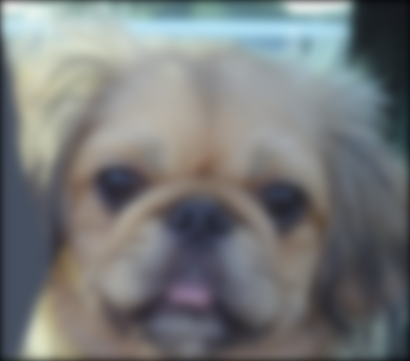

Computing a low frequency dog image


In [26]:
img = Image.open('images/0b_dog.bmp')
sigma = 5

low = gauss_low_freq(img, sigma)
result = Image.fromarray(low.astype('uint8'))

result.save('images/dog_low_freq.png','PNG')

display(result)
print('Computing a low frequency dog image')

### Question 2 (3 points)

Choose an appropriate sigma (it is suggested to use the same as above) and create a high frequency version of the second from the two the paired images. Again you will operate on each of the color channels separately and use same sigma for all channels. High frequency filtered image is obtained by first computing a low frequency Gaussian filtered image and then subtracting it from the original. The high frequency image is actually zero-mean with negative values so it is visualized by adding 128 (if you re-scaled the original image to the range between 0 and 1, then add 0.5 for visualization). In the resulting visualization illustrated below, bright values are positive and dark values are negative.

**Solution Example on Assignment PDF**

<div class="alert alert-warning">

Part 3: Solution 2
    
</div>

In [27]:
# returns high frequency version of an image with desired cutoff frequency (sigma) as an array
def gauss_high_freq(image, sigma):
    
    img = np.asarray(image)
    
    low = gauss_low_freq(image, sigma)

    return img - low

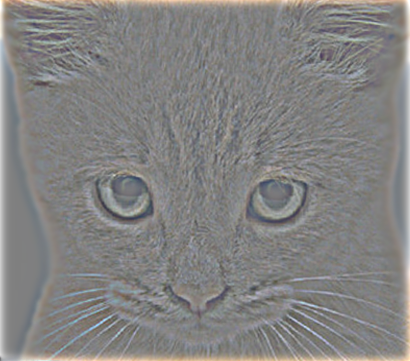

Computing a high frequency cat image


In [28]:
img = Image.open('images/0a_cat.bmp')
sigma = 5

high = gauss_high_freq(img, sigma)

result = np.clip(high + 128, 0, 255)
result = Image.fromarray(result.astype('uint8'))

result.save('images/cat_high_freq.png','PNG')

display(result)
print('Computing a high frequency cat image')

### Question 3 (4 points)

Now simply add the low and high frequency images (per channel). Note, the high frequency image that you add,should be the originally computed high frequency image (without adding 128; this addition is only done for visualizations in the part above) You may get something like the following as a result:

**Solution Example on Assignment PDF**

<div class="alert alert-warning">

Part 3: Solution 3
    
</div>

In [29]:
# combines of two images as an array using desired cutoff frequency (sigma)
def combine(im_low, im_high, sigma):
   
    low = gauss_low_freq(im_low, sigma)
    high = gauss_high_freq(im_high, sigma)

    return np.clip(low + high, 0, 255)

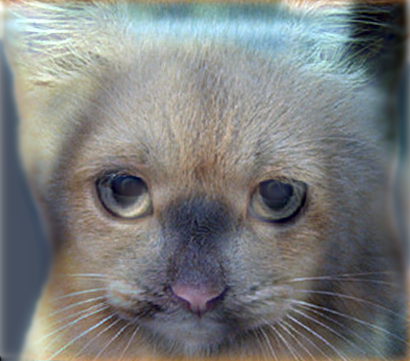

Combining low frequency dog image with high frequency cat image


In [30]:
sigma = 5

high = Image.open('images/0a_cat.bmp')
low = Image.open('images/0b_dog.bmp')

combo = combine(low, high, sigma)
result = Image.fromarray(combo.astype('uint8'))

result.save('images/combo_cat_dog.png','PNG')

display(result)
print('Combining low frequency dog image with high frequency cat image')

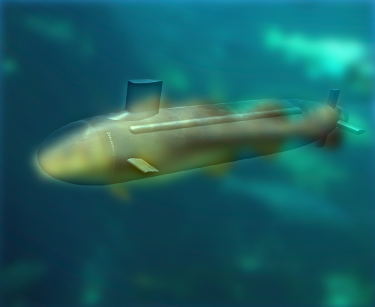

Combining low frequency fish image with high frequency submarine image


In [31]:
sigma = 5

low = Image.open('images/3a_fish.bmp')
high = Image.open('images/3b_submarine.bmp')

combo = combine(low, high, sigma)
result = Image.fromarray(combo.astype('uint8'))

result.save('images/combo_fish_submarine.png','PNG')

display(result)
print('Combining low frequency fish image with high frequency submarine image')

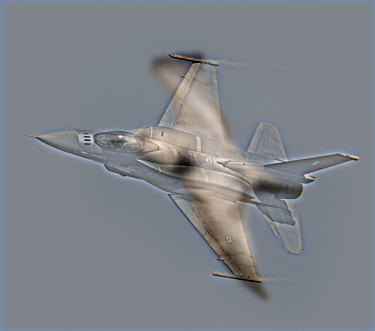

Combining low frequency bird image with high frequency plane image


In [32]:
sigma = 3

low = Image.open('images/4a_bird.bmp')
high = Image.open('images/4b_plane.bmp')

combo = combine(low, high, sigma)
result = Image.fromarray(combo.astype('uint8'))

result.save('images/combo_bird_plane.png','PNG')

display(result)
print('Combining low frequency bird image with high frequency plane image')

## Part 4: Playing with Different Denoising Filters

In this question, you are given two images affected by Gaussian noise and speckle noise box_gauss.png and box_speckle.png. You will apply Gaussian filter, bilateral filter, and median filter respectively to denoise the images. Use the existing implementation in the OpenCV library ‘cv2’. Specifically, you will use the functions ‘cv2.GaussianBlur’, ‘cv2.bilateralFilter’, and ‘cv2.medianBlur’. Please consult the OpenCV documentation for more details.

### Question 1 (6 points)

Play with different combinations of parameters for each filter and show your best results for denoising. Include the best combinations of parameters for each filter and the corresponding resultant images in your report. Note that since you have two images and three filters, you will include a total of six denoised images.

<div class="alert alert-warning">

Part 4: Solution 1
    
</div>

In [33]:
# load images
im_g = cv.imread('images/box_gauss.png')
im_s = cv.imread('images/box_speckle.png')

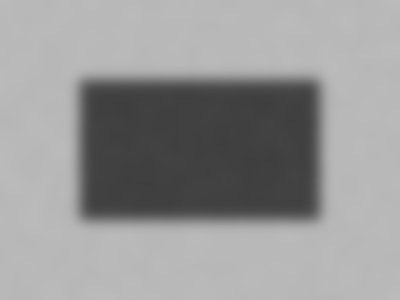

Best result for denoising box_gauss with gaussian filter.
Kernel 41x41 with S.D. relative to kernal size (use 0).



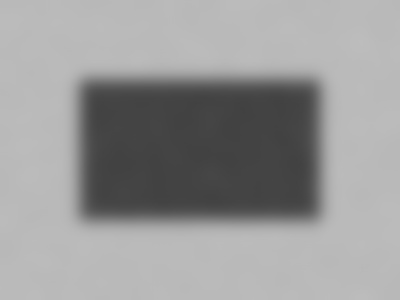

Best result for denoising box_speckle with gaussian filter.
Kernel 51x51 with S.D. relative to kernal size (use 0).



In [34]:
# Best Gaussian Blur
gau_g = cv.GaussianBlur(im_g, (41,41), 0)
cv.imwrite('images/best_gauss_gauss.jpg', gau_g)

gau_s = cv.GaussianBlur(im_s, (51,51), 0)
cv.imwrite('images/best_gauss_speckle.jpg', gau_s)

out_gau_g = Image.open('images/best_gauss_gauss.jpg')
out_gau_s = Image.open('images/best_gauss_speckle.jpg')

display(out_gau_g)
print('Best result for denoising box_gauss with gaussian filter.\nKernel 41x41 with S.D. relative to kernal size (use 0).\n')

display(out_gau_s)
print('Best result for denoising box_speckle with gaussian filter.\nKernel 51x51 with S.D. relative to kernal size (use 0).\n')

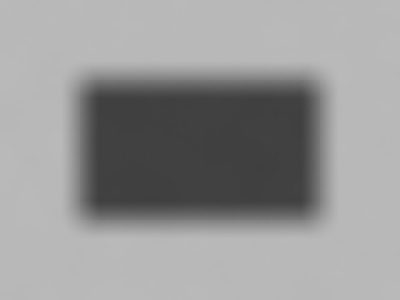

Best result for denoising box_gauss with bilateral filter.
Diameter of 40 with a large value of sigma (1000) such that farther colors within the pixel neighborhood will be mixed together.



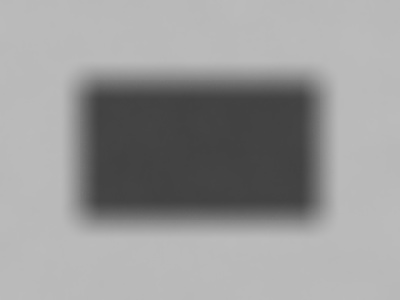

Best result for denoising box_speckle with bilateral filter.
Diameter of 40 with an ever larger value of sigma (1200).



In [35]:
# Best Bilateral Filter
bil_g = cv.bilateralFilter(im_g, 40, 1000, 1000)
cv.imwrite('images/best_bilateral_gauss.jpg', bil_g)

bil_s = cv.bilateralFilter(im_s, 40, 1200, 1200)
cv.imwrite('images/best_bilateral_speckle.jpg', bil_s)

out_bil_g = Image.open('images/best_bilateral_gauss.jpg')
out_bil_s = Image.open('images/best_bilateral_speckle.jpg')


display(out_bil_g)
print('Best result for denoising box_gauss with bilateral filter.\nDiameter of 40 with a large value of sigma (1000) such that farther colors within the pixel neighborhood will be mixed together.\n')

display(out_bil_s)
print('Best result for denoising box_speckle with bilateral filter.\nDiameter of 40 with an ever larger value of sigma (1200).\n')


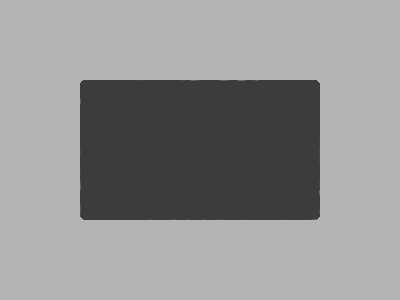

Best result for denoising box_gauss with median blur filter.
Kernal size of 7.



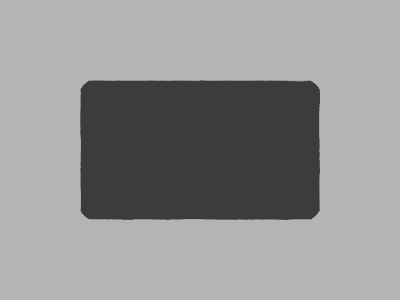

Best result for denoising box_speckle with median blur filter.
Kernal size of 7.



In [36]:
# Best Median Blur
med_g = cv.medianBlur(im_g, 7)
cv.imwrite('images/best_median_gauss.jpg', med_g)

med_s = cv.medianBlur(im_s, 19)
cv.imwrite('images/best_median_speckle.jpg', med_s)

out_med_g = Image.open('images/best_median_gauss.jpg')
out_med_s = Image.open('images/best_median_speckle.jpg')

display(out_med_g)
print('Best result for denoising box_gauss with median blur filter.\nKernal size of 7.\n')

display(out_med_s)
print('Best result for denoising box_speckle with median blur filter.\nKernal size of 7.\n')

### Question 2 (3 points)

Now try to use the following combinations for the two images, and comment the pros and cons of using Gaussian, Bilateral, and Median filter. HINT: You might need to zoom in to see the artifacts clearly.

        
        import cv2
        cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=50)
        cv2.bilateralFilter(img, 7, sigmaColor=150, sigmaSpace=150)
        cv2.medianBlur(img,7)
        

<div class="alert alert-warning">

Part 4: Solution 2
    
</div>

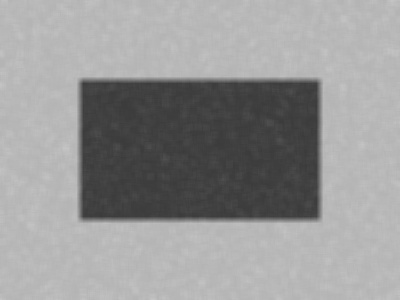

Denoising box_gauss with provided gaussian filter



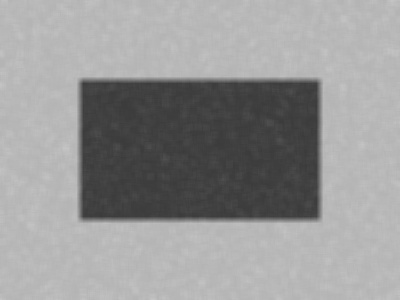

Denoising box_speckle with provided gaussian filter



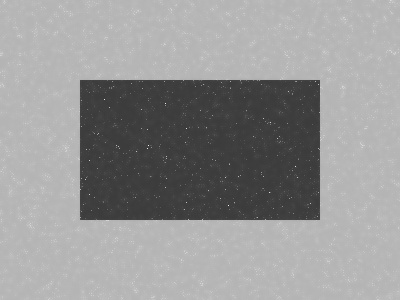

Denoising box_gauss with provided bilateral filter



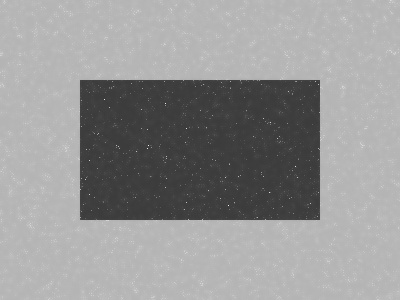

Denoising box_speckle with provided bilateral filter



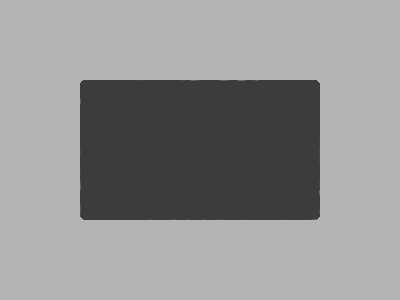

Denoising box_gauss with provided median blur filter



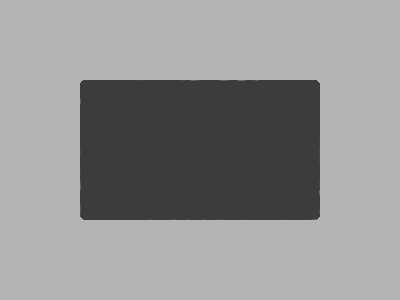

Denoising box_speckle with provided median blur filter



In [37]:
g_g = cv.GaussianBlur(im_g, ksize=(7, 7), sigmaX=50)
g_b = cv.bilateralFilter(im_g, 7, sigmaColor=150, sigmaSpace=150)
g_m = cv.medianBlur(im_g, 7)

s_g = cv.GaussianBlur(im_s, ksize=(7, 7), sigmaX=50)
s_b = cv.bilateralFilter(im_s, 7, sigmaColor=150, sigmaSpace=150)
s_m = cv.medianBlur(im_s, 7)

cv.imwrite('images/given_gauss_gauss.jpg', g_g)
cv.imwrite('images/given_bilateral_gauss.jpg', g_b)
cv.imwrite('images/given_median_gauss.jpg', g_m)

cv.imwrite('images/given_gauss_speckle.jpg', s_g)
cv.imwrite('images/given_bilateral_speckle.jpg', s_b)
cv.imwrite('images/given_median_speckle.jpg', s_m)

out_g_g = Image.open('images/given_gauss_gauss.jpg')
out_g_b = Image.open('images/given_bilateral_gauss.jpg')
out_g_m = Image.open('images/given_median_gauss.jpg')

out_s_g = Image.open('images/given_gauss_speckle.jpg')
out_s_b = Image.open('images/given_bilateral_speckle.jpg')
out_s_m = Image.open('images/given_median_speckle.jpg')

# display gaussian filter on each image
display(out_g_g)
print('Denoising box_gauss with provided gaussian filter\n')
display(out_g_g)
print('Denoising box_speckle with provided gaussian filter\n')

# display bilateral filter on each image
display(out_g_b)
print('Denoising box_gauss with provided bilateral filter\n')
display(out_g_b)
print('Denoising box_speckle with provided bilateral filter\n')

# display median blur on each image
display(out_g_m)
print('Denoising box_gauss with provided median blur filter\n')
display(out_g_m)
print('Denoising box_speckle with provided median blur filter\n')

When comparing the three filter methods we observe a few key differences between them. <br>
Firstly, we notice the gaussian filter does a good job at blurring out the artifacts, but consequently it also blurs out the edge of the square shape found in the provided image.<br>
Next, using the bilateral filter we find it does a good job at distinguishing edges, however, it struggles to get rid of the artifacts especially in the denser speckle image.<br>
Finally, using the median blur filter we find that it does an near perfect job at removing artifacts, whilst still preserving the edges. The only downside to this is the nominal aliasing like effect that occurs on the edges. 